<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [51]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [52]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [53]:
## Write your code here
print("Column names",df.columns)
print("Shape of the dataset",df.shape)
print("Datatypes",df.dtypes)
print("Summary",df.info())

Column names Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
Shape of the dataset (65437, 114)
Datatypes ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
S

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [54]:
## Write your code here
Missing_Employment=df['Employment'].isnull().sum()
Missing_JobSat=df['JobSat'].isnull().sum()
Missing_RemoteWork=df['RemoteWork'].isnull().sum()
print("No of missing values in Employment: ",Missing_Employment)
print("No of missing values in Job Satisfaction: ",Missing_JobSat)
print("No of missing values in Remote Work: ",Missing_RemoteWork)
#Choosing median might be more accurate for ordinal variable JobSat
JobSat_median=df['JobSat'].median()  
print("Replacing JobSat NA values with median value: ",JobSat_median)
df['JobSat']=df['JobSat'].fillna(JobSat_median)
#Choosing most frequently available variable will be right for Categorical Variable RemoteWork
RemoteWork_frequent=df['RemoteWork'].value_counts().sort_values().idxmax()
print("Replacing RemoteWork NA values with frequently occuring value: ","Unknown")
df['RemoteWork']=df['RemoteWork'].fillna("Unknown")
Missing_Employment=df['Employment'].isnull().sum()
Missing_JobSat=df['JobSat'].isnull().sum()
Missing_RemoteWork=df['RemoteWork'].isnull().sum()
print("No of missing values in Employment: ",Missing_Employment)
print("No of missing values in Job Satisfaction: ",Missing_JobSat)
print("No of missing values in Remote Work: ",Missing_RemoteWork)


No of missing values in Employment:  0
No of missing values in Job Satisfaction:  36311
No of missing values in Remote Work:  10631
Replacing JobSat NA values with median value:  7.0
Replacing RemoteWork NA values with frequently occuring value:  Unknown
No of missing values in Employment:  0
No of missing values in Job Satisfaction:  0
No of missing values in Remote Work:  0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [55]:
## Write your code here
print(f"Top 5 Employment Types\n",df['Employment'].value_counts().head())
print(f"Top 5 Job Sat values\n",df['JobSat'].value_counts().head())
print(f"Top 5 Years Code Pro values\n",df['YearsCodePro'].value_counts().head())

Top 5 Employment Types
 Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Name: count, dtype: int64
Top 5 Job Sat values
 JobSat
7.0     42690
8.0      7509
6.0      3751
9.0      3626
10.0     2251
Name: count, dtype: int64
Top 5 Years Code Pro values
 YearsCodePro
2     4168
3     4093
5     3526
10    3251
4     3215
Name: count, dtype: int64


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


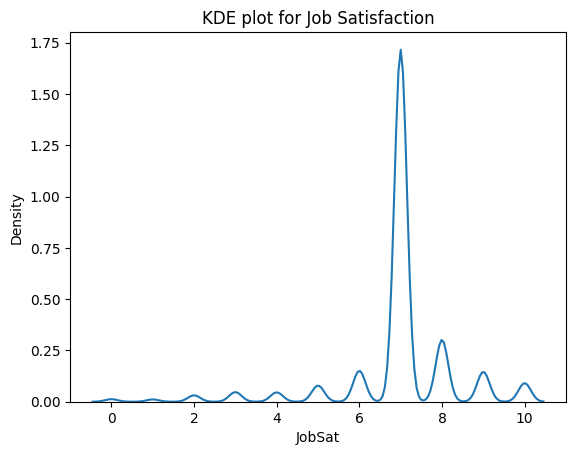

In [56]:
## Write your code here
#df.plot.pie(y='JobSat',figsize=(5,5))
sns.kdeplot(data=df, x='JobSat')
plt.title('KDE plot for Job Satisfaction')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


Text(0.5, 1.0, 'Languages worked with vs Languages want to Work with')

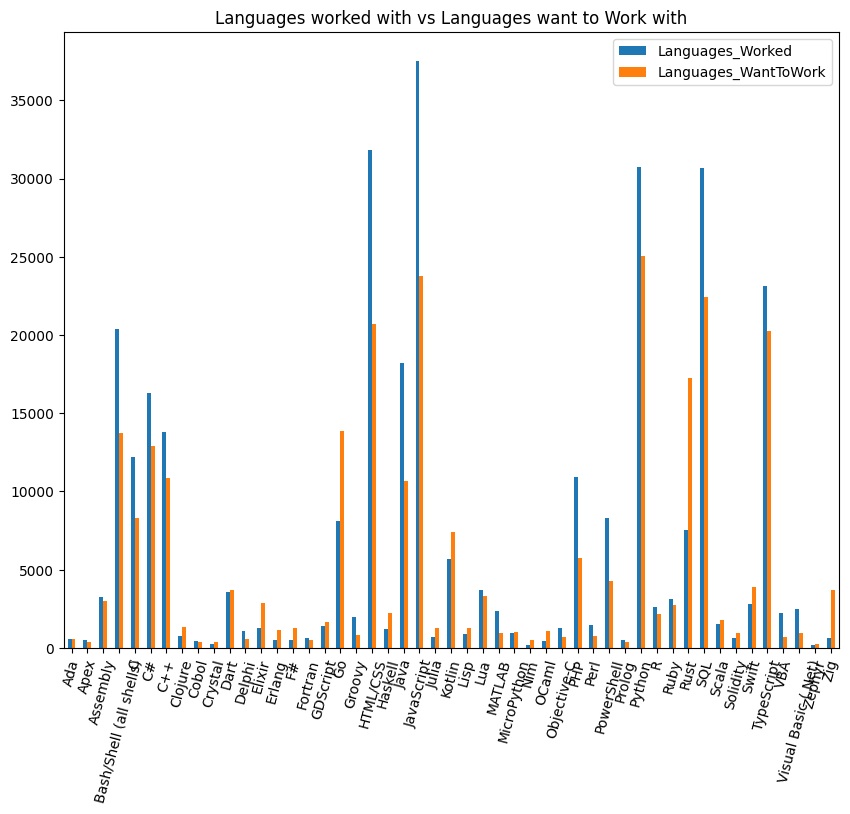

In [57]:
## Write your code here
df_Languages_Worked=df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
df_Languages_WantToWork=df['LanguageWantToWorkWith'].str.get_dummies(sep=';')
df_Languages_Worked_sum=df_Languages_Worked.sum(axis=0)
df_Languages_WantToWork_sum=df_Languages_WantToWork.sum(axis=0)
df_grouped=pd.DataFrame({'Languages_Worked':df_Languages_Worked_sum,'Languages_WantToWork':df_Languages_WantToWork_sum})
ax=df_grouped.plot(kind='bar',rot=75,figsize=(10,8))
ax.set_title('Languages worked with vs Languages want to Work with')

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Axes: xlabel='Country,RemoteWork'>

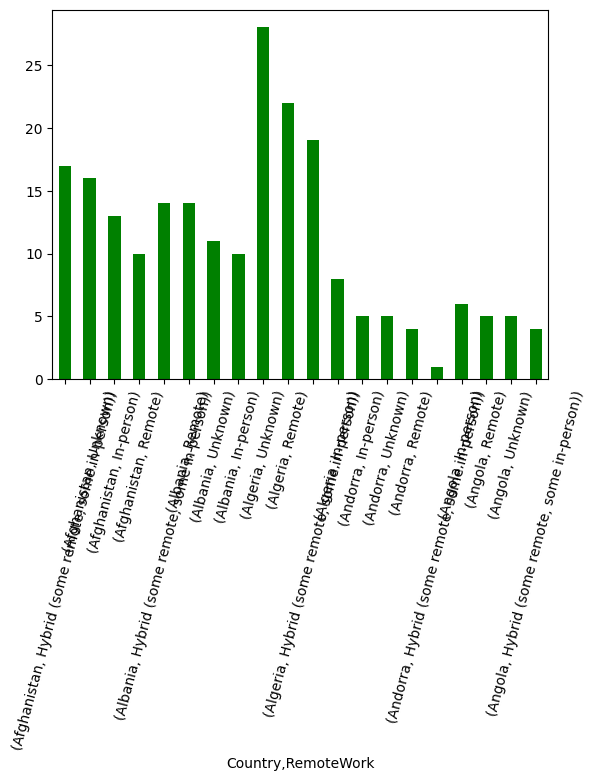

In [58]:
## Write your code here
#df_RemoteWorkTrends=
df.groupby('Country')['RemoteWork'].value_counts().head(20).plot(kind='bar',rot=75,color='green')

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


       YearsCodePro  JobSat  Group_by_Category
1                17     7.0                7.0
2                27     7.0                7.0
6                 7     7.0                7.0
9                11     7.0                7.0
11               25     7.0                7.0
...             ...     ...                ...
65428             7     7.0                7.0
65431            24     7.0                7.0
65432             3     7.0                7.0
65434             5     7.0                7.0
65435             2     7.0                7.0

[51610 rows x 3 columns]
                   YearsCodePro    JobSat  Group_by_Category
YearsCodePro           1.000000  0.072142                NaN
JobSat                 0.072142  1.000000                NaN
Group_by_Category           NaN       NaN                NaN


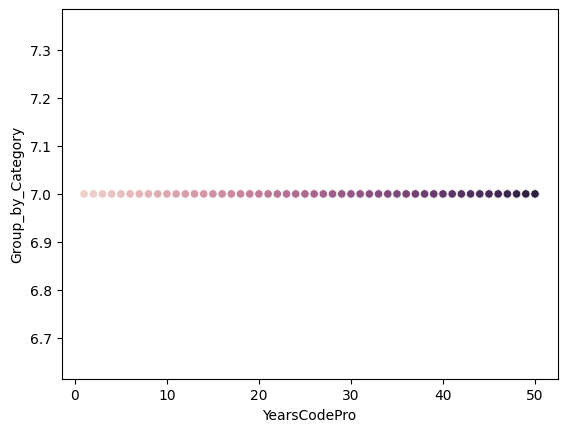

In [59]:
## Write your code here
df=df.dropna(subset=['YearsCodePro'])
df['YearsCodePro']=df['YearsCodePro'].replace("Less than 1 year",1)
df['YearsCodePro']=df['YearsCodePro'].replace("More than 50 years",50)
df['YearsCodePro']=df['YearsCodePro'].astype('int')
df_Sat=df[['YearsCodePro','JobSat']].copy()
df_Sat.set_index(df_Sat.columns[0])
df_Sat['Group_by_Category'] = df.groupby('YearsCodePro')['JobSat'].transform('median')
print(df_Sat)
sns.scatterplot(df_Sat,x='YearsCodePro',y='Group_by_Category',hue='YearsCodePro',legend=False)
import numpy as np
correlation = df_Sat.corr(method='pearson')
print(correlation)

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [60]:
df_Emp=df[['EdLevel','Employment']].copy()
#df_split_employ=df_Emp['Employment'].str.get_dummies(sep=';')
#df_Edu_Emp=df_Emp.join(df_split_employ)
#df_Edu_Emp.drop(columns='Employment', inplace=True) 
#df_Edu_Emp.groupby('EdLevel').sum()
df_crosstab=pd.crosstab(df['EdLevel'],df['Employment'])
print(df_crosstab)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1005   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16102   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   10453   
Primary/elementary school                                           140   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1951   
Secondary school (e.g. American high school, Ge...                 1353   
Some college/university study without earning a...                 3378   
Something else                                                      337   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [62]:
## Write your code here
import os

file_path = os.path.join('.', 'Cleaned_DataDist.csv')
df.to_csv(file_path, index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.


## Write your code here
